In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error


# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read the data
df_2 = pd.read_csv("/content/ETTh2.csv")

# print the first five columns
df_2.head()

# print the data dimension
df_2.shape

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2,2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
3,2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
4,2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500


(17420, 8)

In [3]:
# print some info about the data
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17420 non-null  object 
 1   HUFL    17420 non-null  float64
 2   HULL    17420 non-null  float64
 3   MUFL    17420 non-null  float64
 4   MULL    17420 non-null  float64
 5   LUFL    17420 non-null  float64
 6   LULL    17420 non-null  float64
 7   OT      17420 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [4]:
# print som statistical information about the data
df_2.describe()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,37.193346,8.537565,43.830356,8.322694,-3.423605,-2.085969,26.609376
std,10.218855,6.020442,13.056798,4.366059,6.144403,6.012796,11.888266
min,0.000000,-18.680000,11.205000,-6.594000,-14.350000,-31.462000,-2.646500
25%,30.156000,4.523000,37.394001,5.683000,-9.254000,-2.505000,16.469500
50%,37.193001,9.131000,41.388000,9.302000,-3.774000,-1.226000,26.577000
75%,44.062000,13.152000,46.078999,11.258000,2.527000,0.000000,35.585999
max,107.892998,36.438999,93.230003,28.736000,17.218000,2.932000,58.876999


In [5]:
# set date column as an index
df_2["date"] = pd.to_datetime(df_2["date"])
df_2.set_index("date", inplace= True)

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'Oil Temperature')

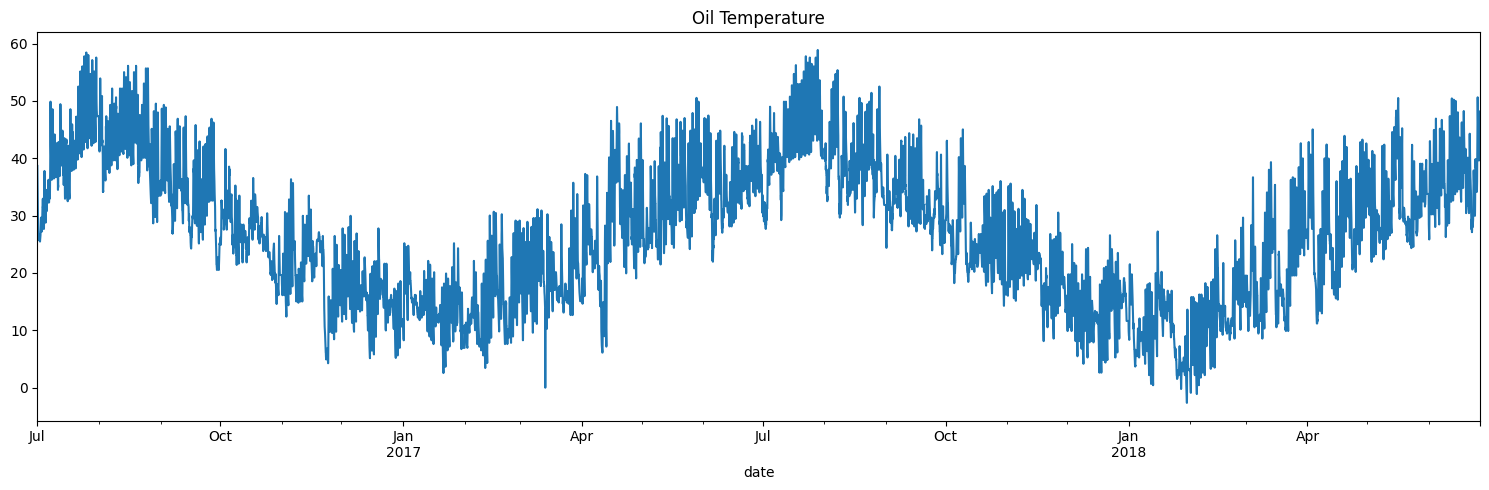

In [6]:
# display oil temperature through the time
plt.figure(figsize=(15, 5))
df_2['OT'].plot()
plt.title("Oil Temperature")
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'HUFL')

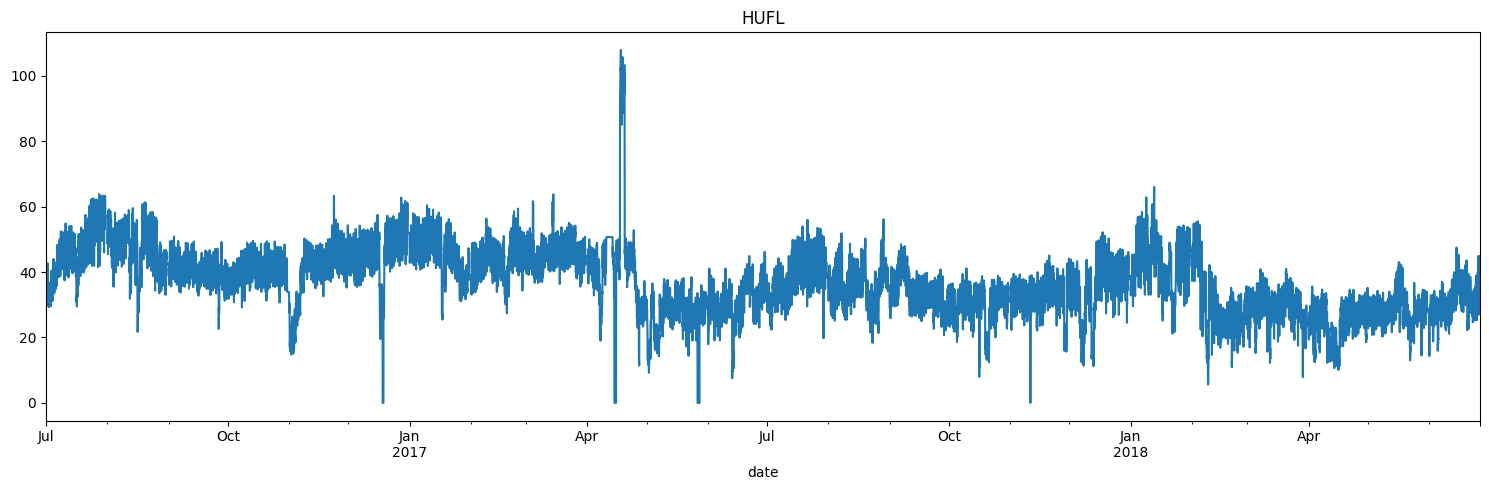

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'HULL')

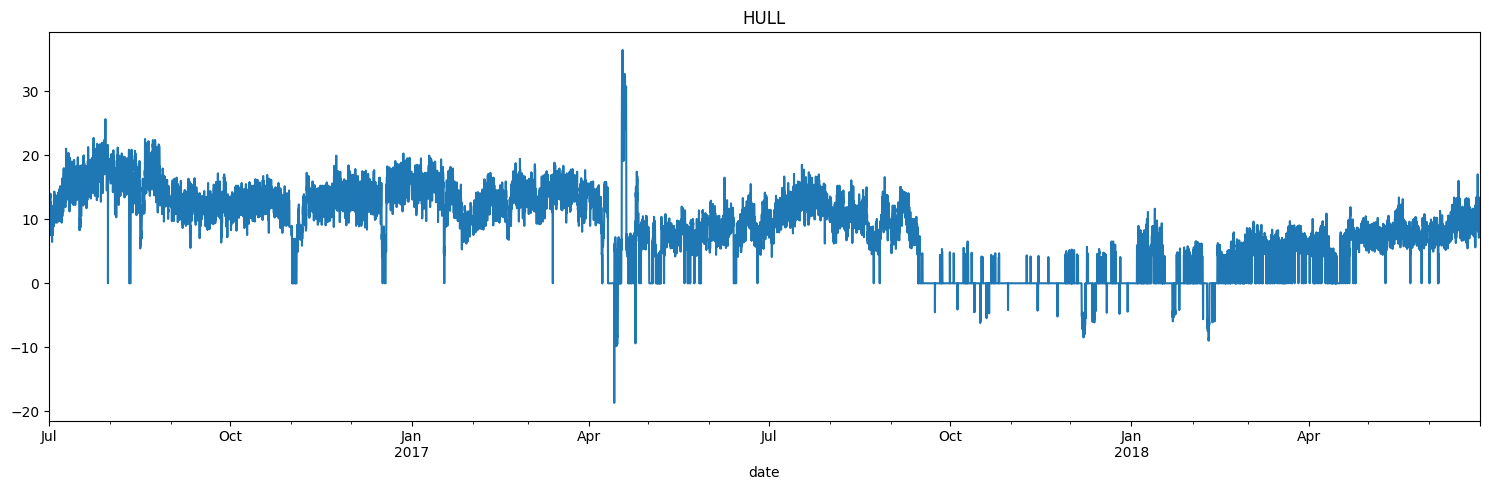

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'MUFL')

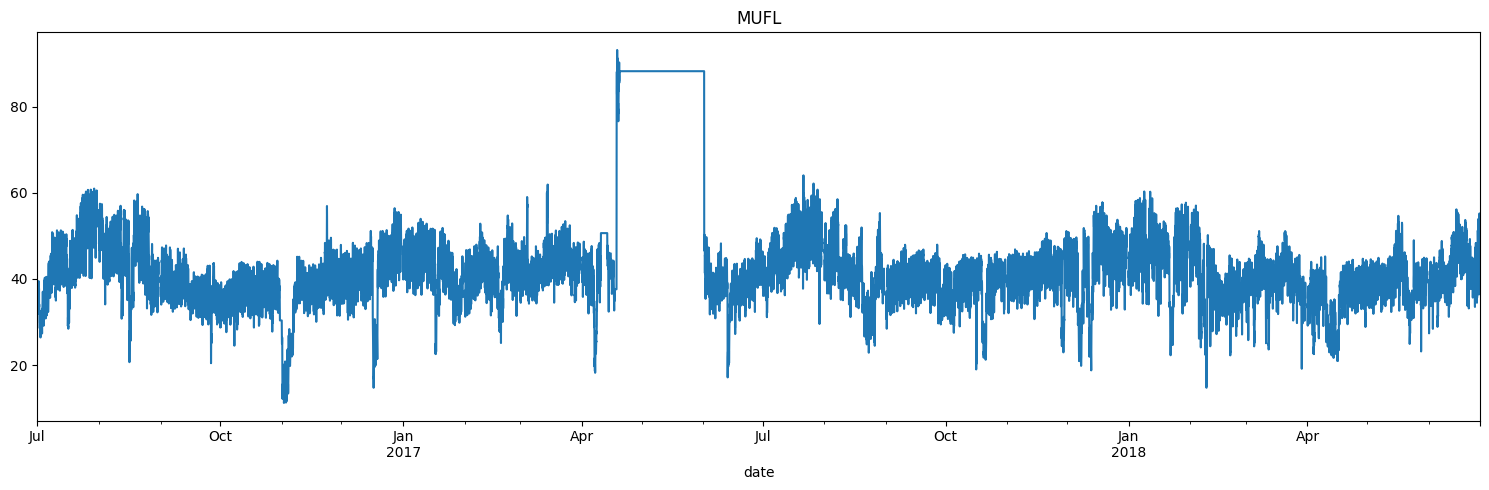

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'MULL')

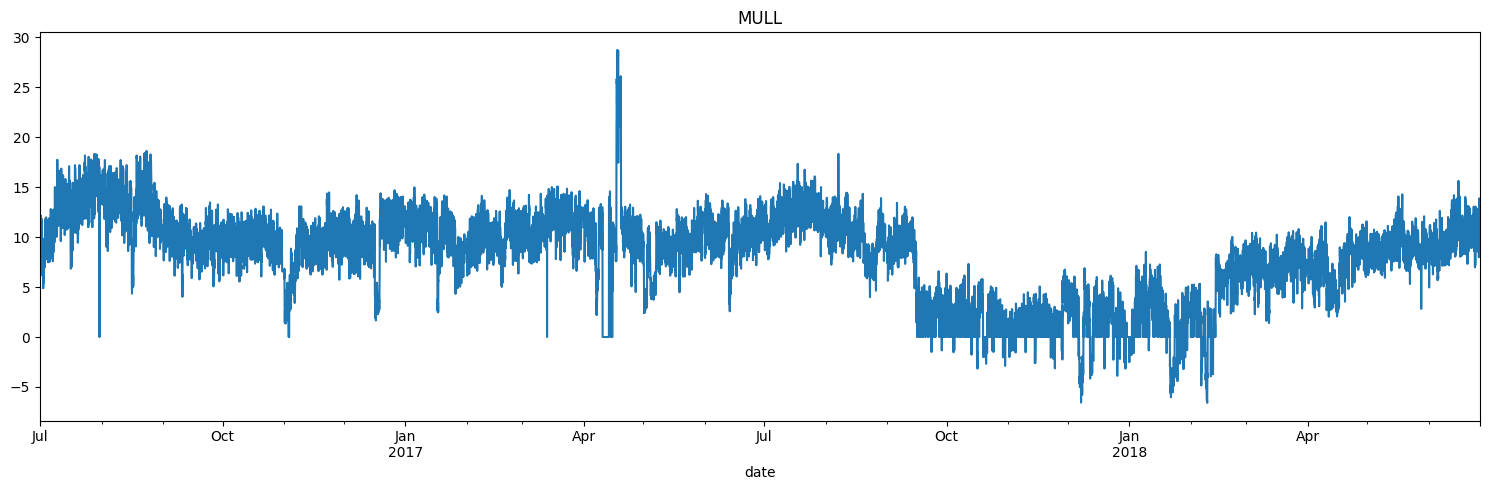

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'LUFL')

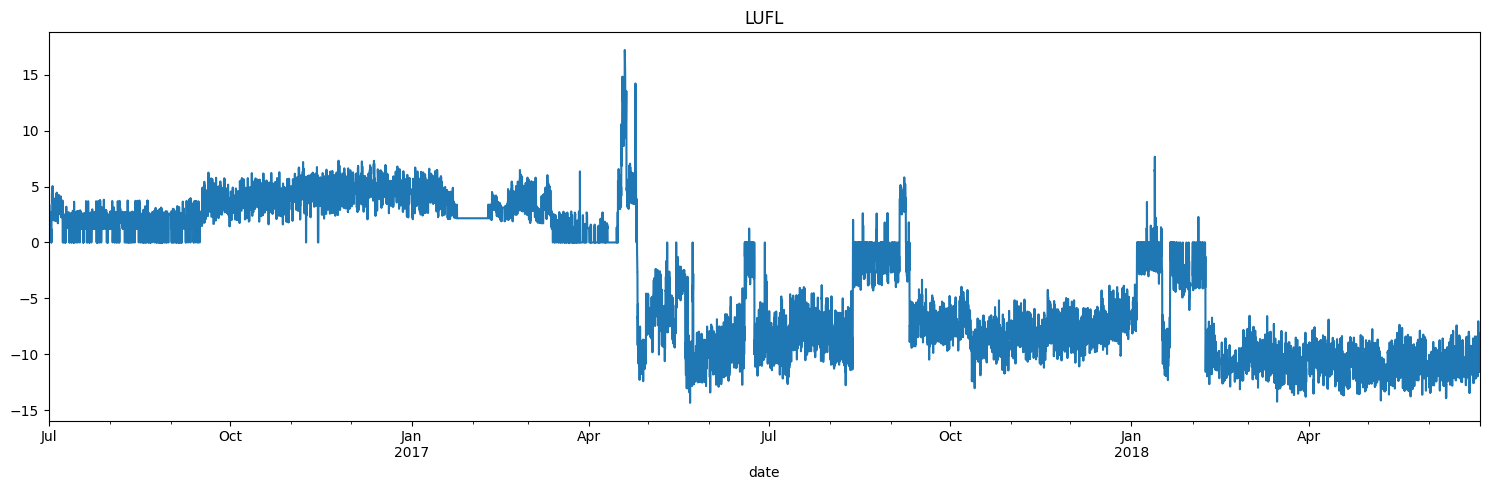

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'LULL')

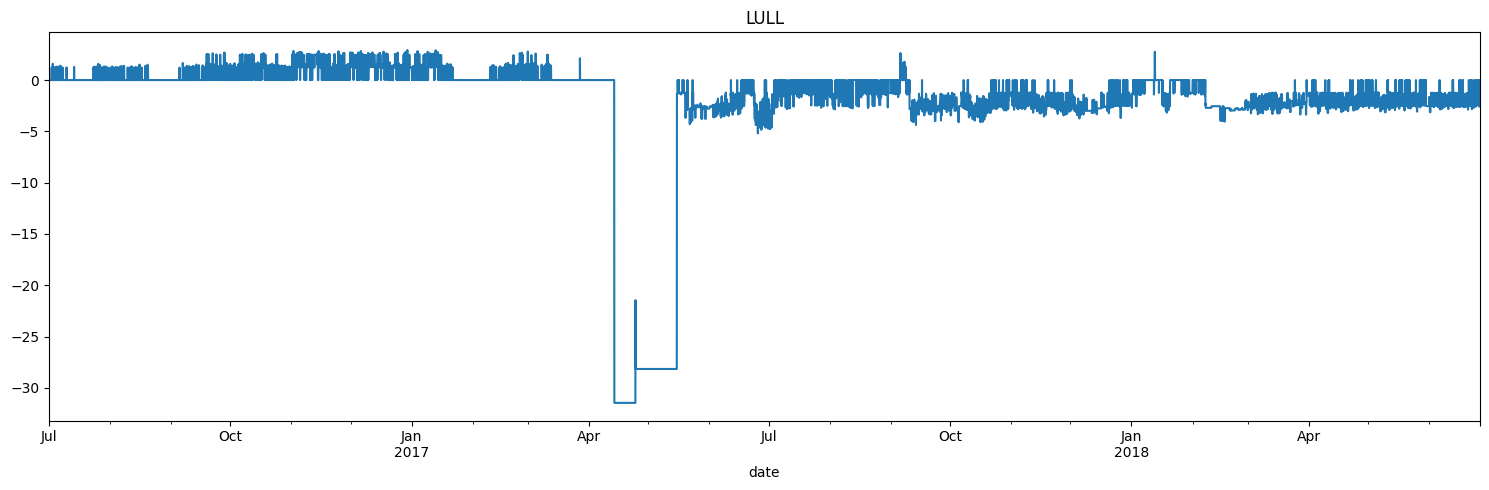

In [7]:
# display the other features through the time

columns = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']

for col in columns:
    plt.figure(figsize=(15, 5))
    df_2[col].plot()
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [8]:
# choose all features because of multi-variance
n_cols = 7
cols = list(df_2.loc[:,:])
dataset = df_2[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(17420, 7)

In [9]:
# perform minmaxscaler on the data
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [10]:
# split the data and specify the training data
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

train_data = scaled_data[0:train_size, :]

train_data.shape

(13936, 7)

In [11]:
# Creating a Training set with 336 time-steps
x_train = []
y_train = []
time_steps = 336
n_cols = 7

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])

In [12]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

# print dimensions for x-train and y-train
x_train.shape , y_train.shape

((17084, 336, 7), (17084, 7))

In [13]:
# build model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(256, return_sequences=True),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_cols)
])

# compile model
model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mse")

# train model
history = model.fit(x_train, y_train, epochs= 100,validation_split=.2, batch_size= 32)

Epoch 1/100
428/428 [==============================] - 32s 48ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2/100
428/428 [==============================] - 19s 45ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3/100
428/428 [==============================] - 19s 45ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4/100
428/428 [==============================] - 18s 43ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 5/100
428/428 [==============================] - 19s 46ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/100
428/428 [==============================] - 20s 46ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 7/100
428/428 [==============================] - 19s 44ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/100
428/428 [==============================] - 

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Losses')

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'loss')

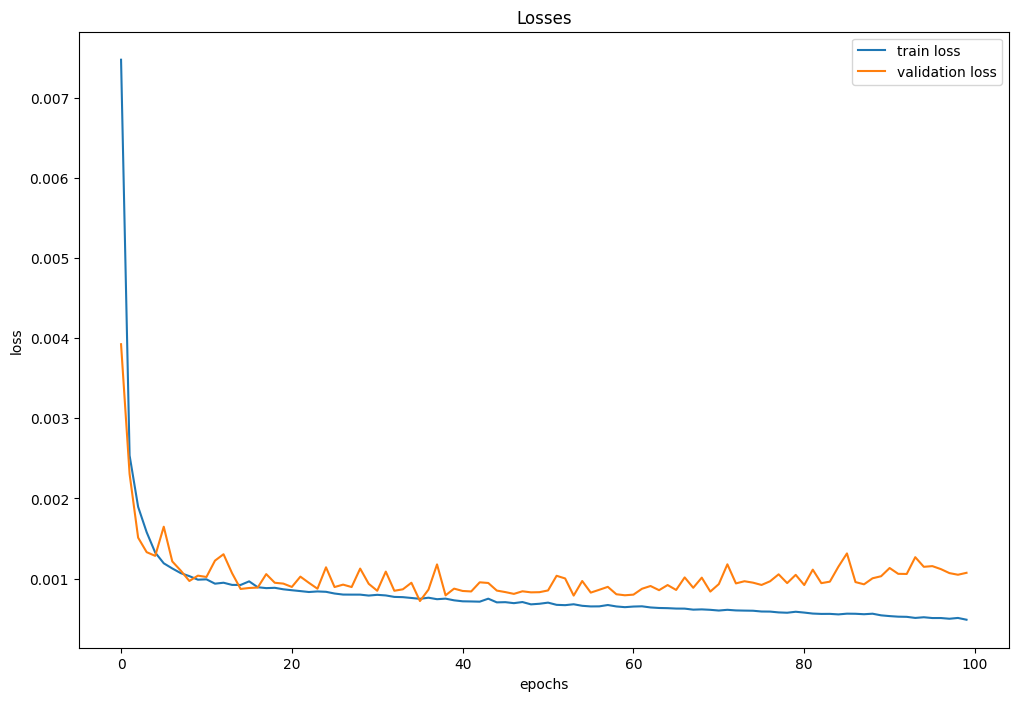

In [14]:
# plot the loss function for training and validation
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['train loss','validation loss'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# prediction_length_336

In [15]:
# Creating a testing set with 336 time-steps
time_steps = 336
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [16]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

109/109 [==============================] - 3s 17ms/step


(3484, 7)

Mean Squared Error (MSE): 0.0010612016892182087
Mean Absolute Error (MAE): 0.0240843300107634


In [17]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(3484, 7)

In [18]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [19]:
# put predictions and actuals in a single dataframe
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,48.204666,45.235001
1,4.265021,4.188000
2,52.288227,49.269001
3,4.600065,3.806000
4,-3.666457,-3.987000
...,...,...
24383,49.146671,49.859001
24384,11.314205,10.669000
24385,-8.528015,-11.525000
24386,-1.304371,-1.418000


<Figure size 1600x600 with 0 Axes>

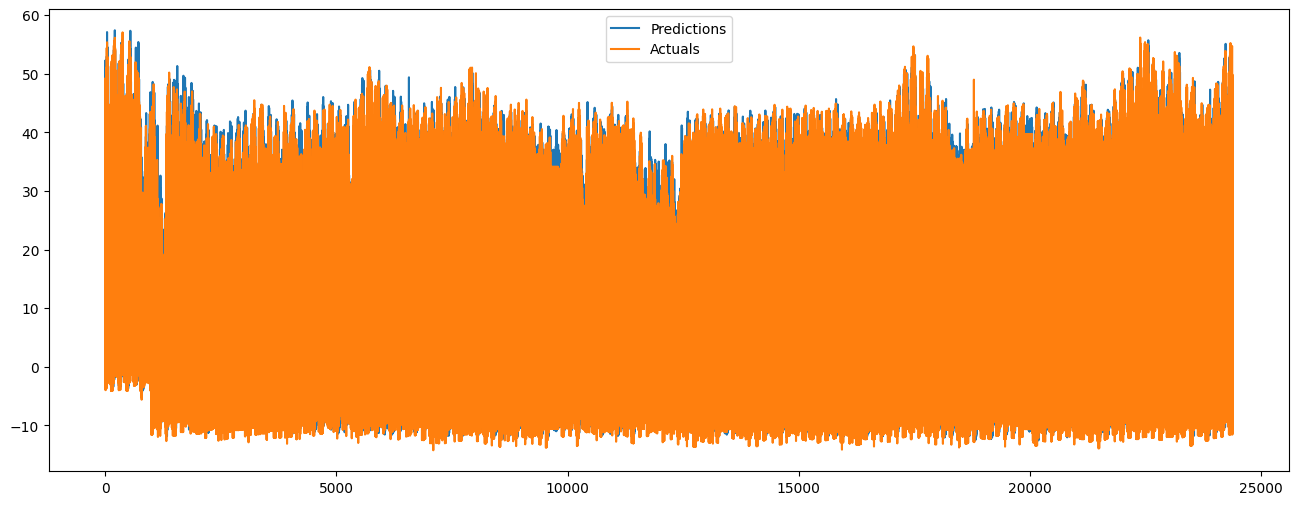

In [20]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

# prediction_length_96

In [21]:
# Creating a testing set with 96 time-steps
time_steps = 96
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [22]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

109/109 [==============================] - 3s 7ms/step


(3484, 7)

Mean Squared Error (MSE): 0.001060570012040562
Mean Absolute Error (MAE): 0.02407825829431284


In [23]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(3484, 7)

In [24]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [25]:
# put predictions and actuals on a single dataframe
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,48.198971,45.235001
1,4.241064,4.188000
2,52.309410,49.269001
3,4.590532,3.806000
4,-3.680610,-3.987000
...,...,...
24383,49.136280,49.859001
24384,11.302009,10.669000
24385,-8.542147,-11.525000
24386,-1.309453,-1.418000


<Figure size 1600x600 with 0 Axes>

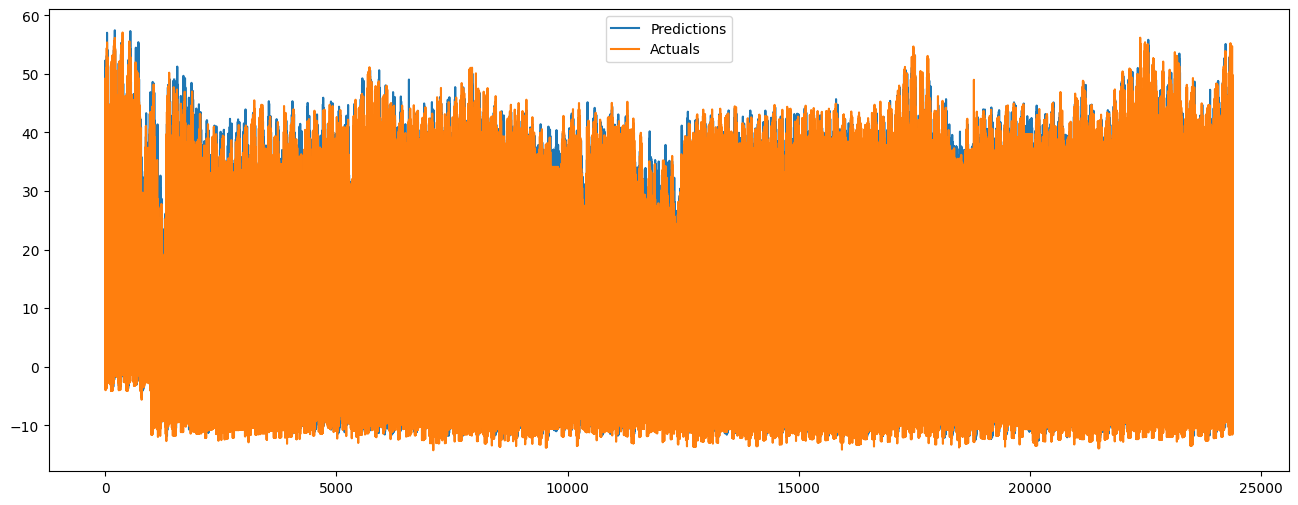

In [26]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

# prediction_length_192

In [27]:
# Creating a testing set with 192 time-steps
time_steps = 192
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [28]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

109/109 [==============================] - 1s 11ms/step


(3484, 7)

Mean Squared Error (MSE): 0.0010611807739389118
Mean Absolute Error (MAE): 0.02408418979157007


In [29]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(3484, 7)

In [30]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [31]:
# put predictions and actuals at one dataframe
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,48.204861,45.235001
1,4.265188,4.188000
2,52.288315,49.269001
3,4.600156,3.806000
4,-3.666420,-3.987000
...,...,...
24383,49.148312,49.859001
24384,11.315201,10.669000
24385,-8.528798,-11.525000
24386,-1.305505,-1.418000


<Figure size 1600x600 with 0 Axes>

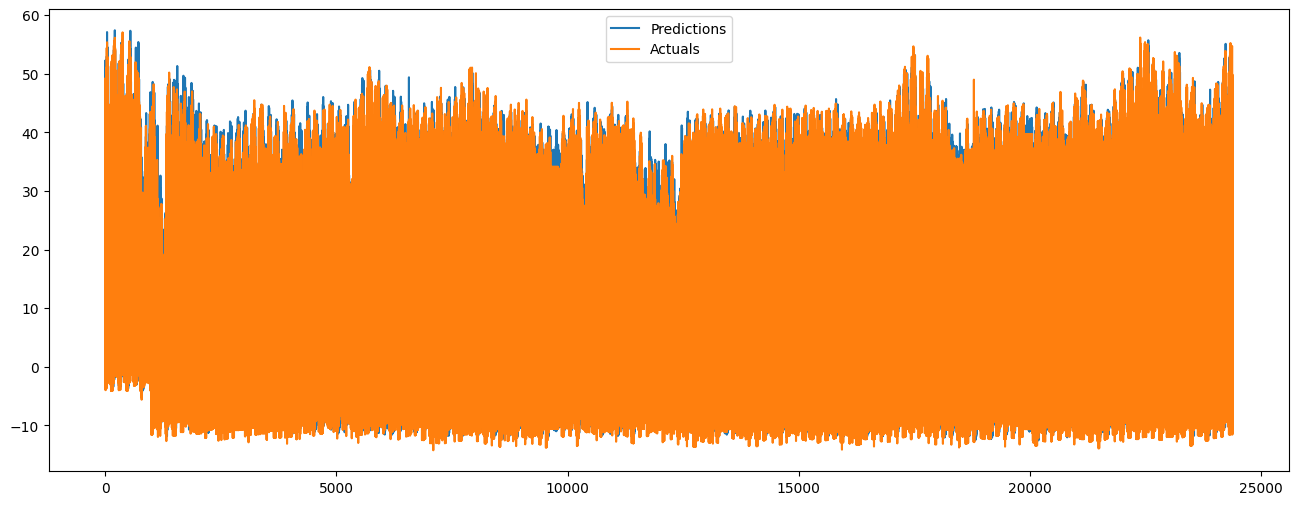

In [32]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

#prediction_length_720

In [33]:
# Creating a testing set with 720 time-steps
time_steps = 720
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [34]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

109/109 [==============================] - 5s 42ms/step


(3484, 7)

Mean Squared Error (MSE): 0.0010612016654763952
Mean Absolute Error (MAE): 0.024084329910558776


In [35]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(3484, 7)

In [36]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [37]:
# put predictions and actuals at single dataframe
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,48.204666,45.235001
1,4.265021,4.188000
2,52.288227,49.269001
3,4.600067,3.806000
4,-3.666458,-3.987000
...,...,...
24383,49.146664,49.859001
24384,11.314205,10.669000
24385,-8.528013,-11.525000
24386,-1.304369,-1.418000


<Figure size 1600x600 with 0 Axes>

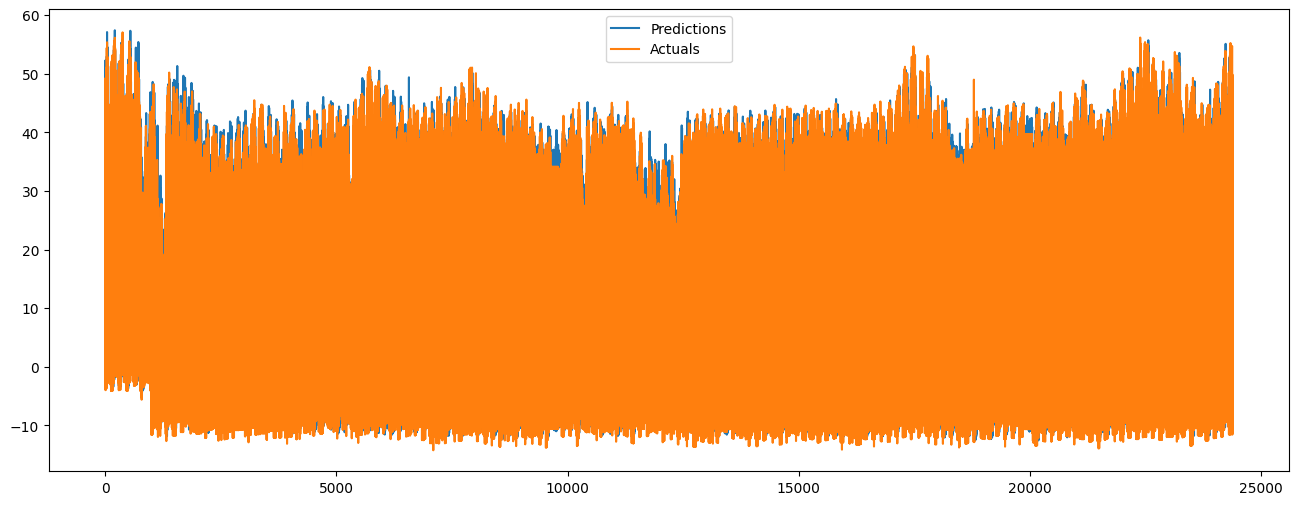

In [38]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()